In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from PIL import Image
import csv

In [3]:
train_df = pd.read_csv('./data/sign_mnist_train.csv')
test_df = pd.read_csv('./data/sign_mnist_test.csv')

In [4]:
y_train = train_df['label'].copy()
y_test = test_df['label'].copy()

In [5]:
y_train.nunique() # number of alphabets excluding J and Z which require motion

24

In [6]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [31]:
print(train_df.isna().sum().value_counts())
print(test_df.isna().sum().value_counts())


0    784
Name: count, dtype: int64
0    784
Name: count, dtype: int64


In [7]:
balance_check = train_df['label'].value_counts()

<Axes: xlabel='label', ylabel='count'>

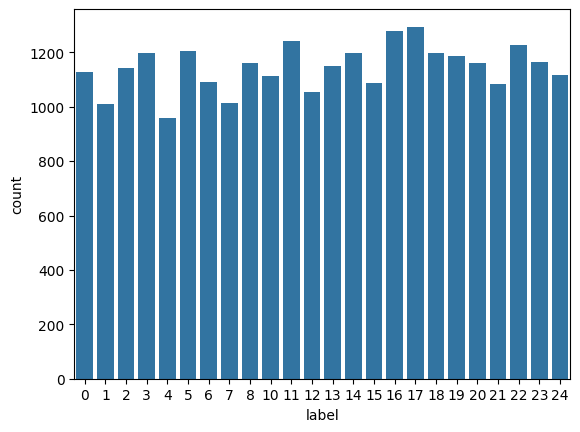

In [8]:
# checking if the data set is balanced.
sns.barplot(balance_check)

In [9]:
del train_df['label']
del test_df['label']

In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [11]:
x_train = train_df.values
x_test = test_df.values

In [18]:
print('length of x_train - ', len(x_train))
print('length of y_train - ', len(y_train))
print('length of x_test - ', len(x_test))
print('length of y_test - ', len(y_test))

length of x_train -  27455
length of y_train -  27455
length of x_test -  7172
length of y_test -  7172


Normalizing pixel values to reduce effect of illuminations differences and to converge model faster.

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))

Visualizing results

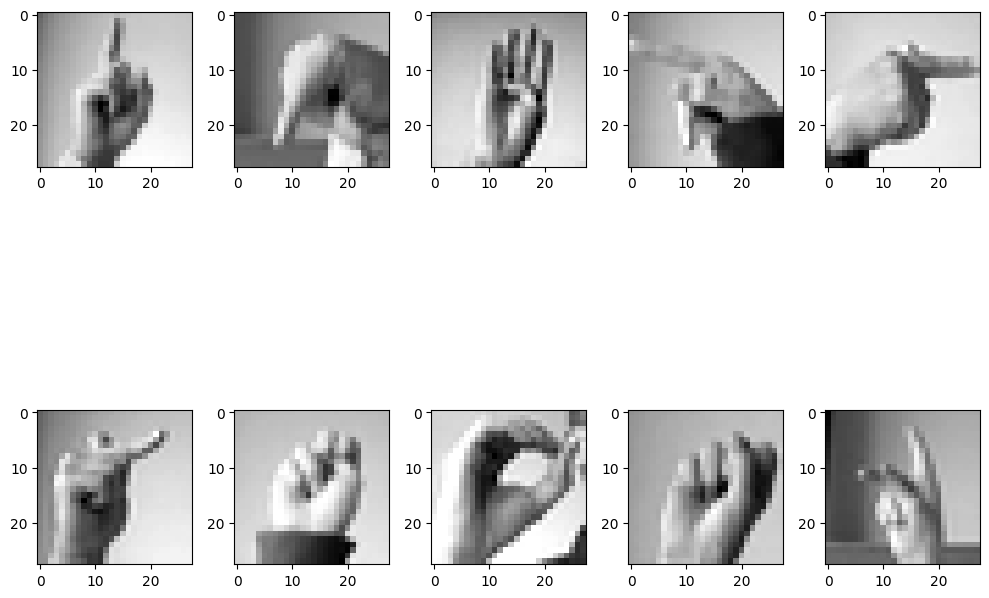

In [14]:
fig, ax = plt.subplots(2,5)
fig.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28,28), cmap='grey')
        k += np.random.randint(0,30)
plt.tight_layout()


Splitting data into training and validatioin sets


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=13)

Buinding Model

In [42]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model architecture
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(24, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
callbacks = tf.keras.callbacks.ModelCheckpoint(filepath='./models/best_model.tf', monitor='val_accuracy', mode='max', save_best_only=True)

# Train the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val), callbacks=callbacks)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/30
601/601 [==============================] - ETA: 0s - loss: 1.5365 - accuracy: 0.5185

INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


601/601 [==============================] - 10s 17ms/step - loss: 1.5365 - accuracy: 0.5185 - val_loss: 0.5573 - val_accuracy: 0.8126
Epoch 2/30
601/601 [==============================] - ETA: 0s - loss: 0.3440 - accuracy: 0.8812

INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


601/601 [==============================] - 10s 16ms/step - loss: 0.3440 - accuracy: 0.8812 - val_loss: 0.2649 - val_accuracy: 0.9099
Epoch 3/30
601/601 [==============================] - ETA: 0s - loss: 0.2110 - accuracy: 0.9347

INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


601/601 [==============================] - 10s 16ms/step - loss: 0.2110 - accuracy: 0.9347 - val_loss: 0.1497 - val_accuracy: 0.9463
Epoch 4/30
599/601 [============================>.] - ETA: 0s - loss: 0.1285 - accuracy: 0.9617

INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


601/601 [==============================] - 9s 16ms/step - loss: 0.1282 - accuracy: 0.9618 - val_loss: 0.0930 - val_accuracy: 0.9689
Epoch 5/30
601/601 [==============================] - 9s 16ms/step - loss: 0.1075 - accuracy: 0.9737 - val_loss: 0.1487 - val_accuracy: 0.9637
Epoch 6/30
597/601 [============================>.] - ETA: 0s - loss: 0.2243 - accuracy: 0.9574

INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


601/601 [==============================] - 10s 16ms/step - loss: 0.2233 - accuracy: 0.9575 - val_loss: 0.1230 - val_accuracy: 0.9785
Epoch 7/30
600/601 [============================>.] - ETA: 0s - loss: 0.1904 - accuracy: 0.9726

INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


601/601 [==============================] - 10s 16ms/step - loss: 0.1902 - accuracy: 0.9726 - val_loss: 0.1479 - val_accuracy: 0.9800
Epoch 8/30
598/601 [============================>.] - ETA: 0s - loss: 0.1853 - accuracy: 0.9786

INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


601/601 [==============================] - 10s 16ms/step - loss: 0.1845 - accuracy: 0.9787 - val_loss: 0.0172 - val_accuracy: 0.9964
Epoch 9/30
601/601 [==============================] - 9s 16ms/step - loss: 0.2339 - accuracy: 0.9776 - val_loss: 0.0637 - val_accuracy: 0.9914
Epoch 10/30
601/601 [==============================] - 9s 16ms/step - loss: 0.2620 - accuracy: 0.9798 - val_loss: 0.4082 - val_accuracy: 0.9673
Epoch 11/30
601/601 [==============================] - 9s 16ms/step - loss: 0.2778 - accuracy: 0.9820 - val_loss: 0.1000 - val_accuracy: 0.9903
Epoch 12/30
601/601 [==============================] - 9s 16ms/step - loss: 0.2896 - accuracy: 0.9844 - val_loss: 0.1120 - val_accuracy: 0.9911
Epoch 13/30
601/601 [==============================] - 9s 15ms/step - loss: 0.3400 - accuracy: 0.9852 - val_loss: 0.2093 - val_accuracy: 0.9899
Epoch 14/30
601/601 [==============================] - 9s 15ms/step - loss: 0.3592 - accuracy: 0.9859 - val_loss: 0.3276 - val_accuracy: 0.9896
Epoc

INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


601/601 [==============================] - 10s 16ms/step - loss: 0.6770 - accuracy: 0.9866 - val_loss: 0.0382 - val_accuracy: 0.9984
Epoch 19/30
597/601 [============================>.] - ETA: 0s - loss: 0.4776 - accuracy: 0.9901

INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


INFO:tensorflow:Assets written to: ./models/best_model.tf/assets


601/601 [==============================] - 10s 16ms/step - loss: 0.4764 - accuracy: 0.9901 - val_loss: 0.0072 - val_accuracy: 0.9996
Epoch 20/30
601/601 [==============================] - 9s 15ms/step - loss: 0.1588 - accuracy: 0.9959 - val_loss: 1.4973 - val_accuracy: 0.9749
Epoch 21/30
601/601 [==============================] - 9s 15ms/step - loss: 1.1919 - accuracy: 0.9832 - val_loss: 0.8550 - val_accuracy: 0.9865
Epoch 22/30
601/601 [==============================] - 9s 15ms/step - loss: 0.4939 - accuracy: 0.9928 - val_loss: 1.3699 - val_accuracy: 0.9847
Epoch 23/30
601/601 [==============================] - 9s 16ms/step - loss: 0.4068 - accuracy: 0.9934 - val_loss: 0.2002 - val_accuracy: 0.9959
Epoch 24/30
601/601 [==============================] - 9s 16ms/step - loss: 0.8545 - accuracy: 0.9905 - val_loss: 1.2216 - val_accuracy: 0.9834
Epoch 25/30
601/601 [==============================] - 9s 16ms/step - loss: 0.6613 - accuracy: 0.9937 - val_loss: 5.2464 - val_accuracy: 0.9650
Epo